<p><b>Applied Computational Science I</b></p>
<h1 style="margin:0px">Lab: Linear Algebra: Google PageRank</h1>
<br/>
<p>Anand Kamble</p>
<a href="mailto:amk23j@fsu.edu">amk23j@fsu.edu</a>
<p>5th October 2023</p>
<hr style="border:2px solid gray"/>

In [1]:
# Importing required packages.
import numpy as np
import timeit
import matplotlib.pyplot as plt
from IPython.display import Markdown, display, Latex

In [2]:
# Helper functions
def np_array_to_latex(arr, title = ""):
    """
    Convert a NumPy array to a LaTeX formatted string.

    Parameters
    ----------
    arr : numpy.ndarray
        The NumPy array to convert to LaTeX.
    title : str, optional
        A title to prepend to the LaTeX string, by default "".

    Returns
    -------
    str
        A LaTeX formatted string representing the input array.

    Examples
    --------
    >>> import numpy as np
    >>> arr = np.array([[1, 2], [3, 4]])
    >>> np_array_to_latex(arr, "My Matrix: ")
    'My Matrix: $\\begin{bmatrix}1.000000 & 2.000000\\\\3.000000 & 4.000000\\end{bmatrix}$'
    """
    latex_str = np.array2string(arr, separator=' & ', formatter={'float': lambda x: f"{x:.6f}"}, suppress_small=True)
    latex_str = latex_str.replace('[', '$\\begin{bmatrix}')
    latex_str = latex_str.replace(']', '\\end{bmatrix}$')
    return title + latex_str


<hr style="border:2px solid gray"/><br/><br/>

#### Adjacency Matrix 

A function which will create an adjacency matrix of given dimensions.

In [3]:
# Function which creates the matrix with given dimensions.
def create_matrix(n):
    """
    Creates a matrix with given dimensions.

    Parameters:
    n (int): The number of rows and columns in the matrix.

    Returns:
    numpy.ndarray: A square matrix of size n x n with random binary values, where the diagonal elements are 0 and each column has at least one non-zero element.
    """
    A = np.random.randint(0, 2, (n, n))
    np.fill_diagonal(A, 0)
    while np.any(np.sum(A, axis=0) == 0):
        A = np.random.randint(0, 2, (n, n))
        np.fill_diagonal(A, 0)
    return A

<hr style="border:2px solid gray"/><br/><br/>

#### Method 1
$$(I - dM)R = {{1 - d} \over n}1$$


In [4]:
# Method 1 to find the page ranks.
def Method_1(A, d=0.85):
    """
    Calculates the page ranks of a given adjacency matrix using Method 1.

    Parameters:
    A (numpy.ndarray): The adjacency matrix of a directed graph.
    d (float): The damping factor. Default value is 0.85.

    Returns:
    numpy.ndarray: A vector of page ranks for each node in the graph.
    """
    n = A.shape[0]
    M = A / np.sum(A, axis=0)
    R = np.linalg.solve(np.eye(n) - d * M, (1 - d) / n * np.ones(n))
    return R

<hr style="border:2px solid gray"/><br/><br/>

#### Method 2
$$ R = (dM + {{1 - d}\over n}E)R $$
$$ = \hat{M} R$$

In [5]:
def Method_2(A, d=0.85, tol=1e-6, max_iter=100):
    """
    Calculates the page ranks of a given adjacency matrix using Method 2.

    Parameters:
    A (numpy.ndarray): The adjacency matrix of a directed graph.
    d (float): The damping factor. Default value is 0.85.
    tol (float): The tolerance for convergence. Default value is 1e-6.
    max_iter (int): The maximum number of iterations. Default value is 100.

    Returns:
    numpy.ndarray: A vector of page ranks for each node in the graph.
    """
    n = A.shape[0]
    M = A / np.sum(A, axis=0)
    M_hat = d * M + (1 - d) / n * np.ones((n, n))
    R = np.ones(n) / n
    for _ in range(max_iter):
        R_next = M_hat @ R
        if np.linalg.norm(R_next - R) < tol:
            break
        R = R_next
    return R

<hr style="border:2px solid gray"/><br/><br/>

Assuming $n=10$, we can find the page ranks by both methods as follows,

In [6]:
"""
Calculating ranks for n = 10, using both the methods defined above.
"""

n = 10
A = create_matrix(n)
r1 = Method_1(A)
r2 = Method_2(A)

display(Markdown("The value of R calculated by <b>method 1</b> is,"))
display(Latex( "$R_{1} =\ $" + np_array_to_latex(r1)))
display(Markdown("The value of R calculated by <b>method 2</b> is,"))
display(Latex( "$R_{2} =\ $" + np_array_to_latex(r2)))


The value of R calculated by <b>method 1</b> is,

<IPython.core.display.Latex object>

The value of R calculated by <b>method 2</b> is,

<IPython.core.display.Latex object>

<hr style="border:2px solid gray"/><br/><br/>

Using the same methods, we can substitute $n = 5, 10, 50, 100, 500, 1000, 2000, 5000$ and calculate the computational costs for both methods.

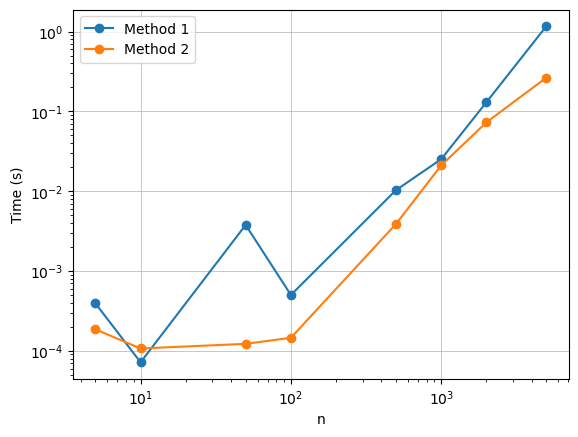

In [7]:
def Measure_time(n_values):
    """
    Measure the time taken by two methods for different matrix sizes.

    Parameters:
    n_values (list): A list of integers representing the sizes of the matrices.

    Returns:
    tuple: A tuple of two lists, each containing the time taken by the two methods for the corresponding matrix size.
    """
    method_1_times = []
    method_2_times = []

    for n in n_values:
        A = create_matrix(n)
        method_1_times.append(timeit.Timer(lambda: Method_1(A)).timeit(number=1))
        method_2_times.append(timeit.Timer(lambda: Method_2(A)).timeit(number=1))

    return method_1_times, method_2_times


# Values of n.
n_values = [5, 10, 50, 100, 500, 1000, 2000, 5000]
# Measuring time taken for all values of n.
method_1_times, method_2_times = Measure_time(n_values)

plt.loglog(n_values, method_1_times,marker='o',  label="Method 1")
plt.loglog(n_values, method_2_times,marker='o', label="Method 2")
plt.xlabel("n")
plt.ylabel("Time (s)")
plt.grid(visible=True,linewidth=0.5)
plt.legend()
plt.show()


It can seen that from above graph, which is a log-log plot of the computational cost of both methods against $n$, the computational cost increases with increase in $n$. But at higher values of $n$, method 2, that is the power method seems more efficient compared to method 1. Also for both methods, the time required is increasing exponentially.

<hr style="border:2px solid gray"/><br/><br/>


### Most Aggressive Termination Criterion

In [8]:
# Function which will calculate the minimum tolerance.
def findMinTolerance(A,Rank_Order, d=0.85, max_iter=100):
    """
    Calculate the minimum tolerance for a given matrix and rank order.

    Parameters:
    A (numpy.ndarray): A square matrix.
    Rank_Order (numpy.ndarray): A 1D array of integers representing the desired rank order.
    d (float): A damping factor. Default is 0.85.
    max_iter (int): Maximum number of iterations. Default is 100.

    Returns:
    float: The minimum tolerance.
    """
    n = A.shape[0]
    M = A / np.sum(A, axis=0)
    M_hat = d * M + (1 - d) / n * np.ones((n, n))
    R = np.ones(n) / n
    tol = float('inf')
    for _ in range(max_iter):
        R_next = M_hat @ R
        tol = np.linalg.norm(R_next - R)
        if (np.argsort(R_next) == Rank_Order).all(): 
            return tol 
        R = R_next
        
        
def minTolerance(n):
    """
    Calculate the minimum tolerance for a given matrix of size n.

    Parameters:
    n (int): The size of the matrix.

    Returns:
    float: The minimum tolerance.
    """
    A = create_matrix(n)
    Result_Method_1 = Method_1(A)
    Method_1_Rank_Orders = np.argsort(Result_Method_1)
    return findMinTolerance(A,Method_1_Rank_Orders)


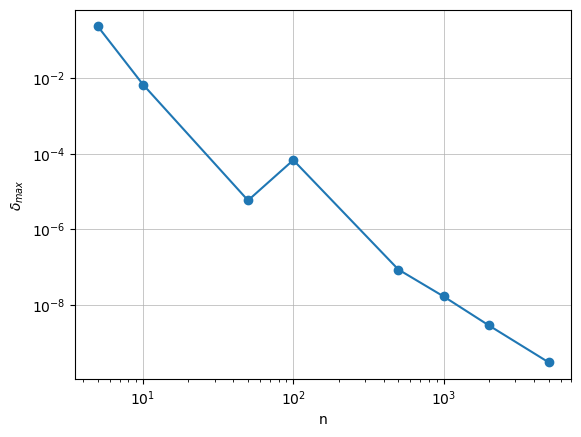

<IPython.core.display.Latex object>

In [9]:
# Values of n.
n_values = [5, 10, 50, 100, 500, 1000, 2000, 5000]

# Measuring Tolerances for all values of n.
Tolerances = [minTolerance(n) for n in n_values]

plt.loglog(n_values, Tolerances,marker='o')
plt.xlabel("n")
plt.ylabel("$\delta_{max}$")
plt.grid(visible=True,linewidth=0.5)
plt.show()
display(Latex("$\delta =\ " + str(Tolerances) + "$"))

<hr style="border:2px solid gray"/><br/><br/>

### Search Engine Optimization

Search Engine Optimization (SEO), has became a cottage industry. Many developers use techniques like keyword optimization, and backlink building to rank their websites higher on the search engines. Nowadays, even languages like HTML provide speacial tags such as `meta` to include keywords and brief discriptions of the webpages. This helps the search engines to better rank the websites. These methods also come with their own disadvantages since these tags and keywords can be excessively used. Search engines prioritizes quality content and real used experience, which avoids listing of sites that might be engaging in deceptive practices.

<br/><br/>

<hr style="border:2px solid gray"/>